## **CNN with CIFAR-10 Data**

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt    
%matplotlib inline

In [2]:
np.set_printoptions(suppress=True)

In [3]:
print(tf.__version__)

2.8.0


In [ ]:
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [ ]:
#tf.config.list_physical_devices('GPU')

In [ ]:
#Release GPU memory to prevent memory-leaks.

#from numba import cuda
#device = cuda.get_current_device()
#device.reset()

In [ ]:
#!nvidia-smi

In [4]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# ilk önce datayı yüklemek için alltaki kod bloğunu çalıştırdıktan sonra 
# "certificate verify failed: certificate has expired" hatası üzerine bu kod çalıştırıldı

In [5]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [6]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  50000 images in the training dataset
There are  10000 images in the test dataset


In [7]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

In [8]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

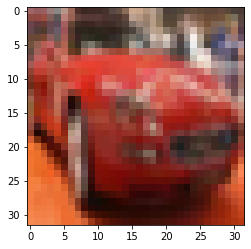

In [9]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

In [10]:
y_train[5]

array([1], dtype=uint8)

In [11]:
y_train.shape

(50000, 1)

In [12]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

In [13]:
np.array(np.unique(y_train, return_counts=True)).T

array([[   0, 5000],
       [   1, 5000],
       [   2, 5000],
       [   3, 5000],
       [   4, 5000],
       [   5, 5000],
       [   6, 5000],
       [   7, 5000],
       [   8, 5000],
       [   9, 5000]], dtype=int64)

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [14]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [15]:
classes[int(y_train[5])]

'automobile'

In [16]:
classes[int(y_train[0])]

'frog'

In [17]:
int(np.random.randint(low=0, high=50000, size=1))  # index olarak kullanılabilecek bir kod yazdık

11235

In [18]:
X_train[int(np.random.randint(low=0, high=50000, size=1))]

array([[[162, 152, 157],
        [164, 155, 160],
        [166, 157, 163],
        ...,
        [161, 161, 159],
        [159, 159, 157],
        [156, 156, 155]],

       [[163, 153, 158],
        [166, 156, 161],
        [168, 158, 164],
        ...,
        [160, 160, 159],
        [158, 158, 157],
        [155, 155, 154]],

       [[164, 153, 159],
        [168, 157, 162],
        [170, 159, 164],
        ...,
        [158, 158, 158],
        [156, 156, 156],
        [153, 153, 153]],

       ...,

       [[235, 235, 235],
        [238, 238, 237],
        [241, 241, 239],
        ...,
        [ 74,  71,  70],
        [118, 114, 115],
        [159, 155, 156]],

       [[237, 237, 237],
        [241, 241, 240],
        [245, 245, 243],
        ...,
        [ 70,  68,  67],
        [101,  97,  97],
        [109, 106, 104]],

       [[237, 237, 236],
        [239, 239, 238],
        [243, 243, 242],
        ...,
        [ 64,  61,  62],
        [ 86,  82,  80],
        [ 78,  75,  74]]

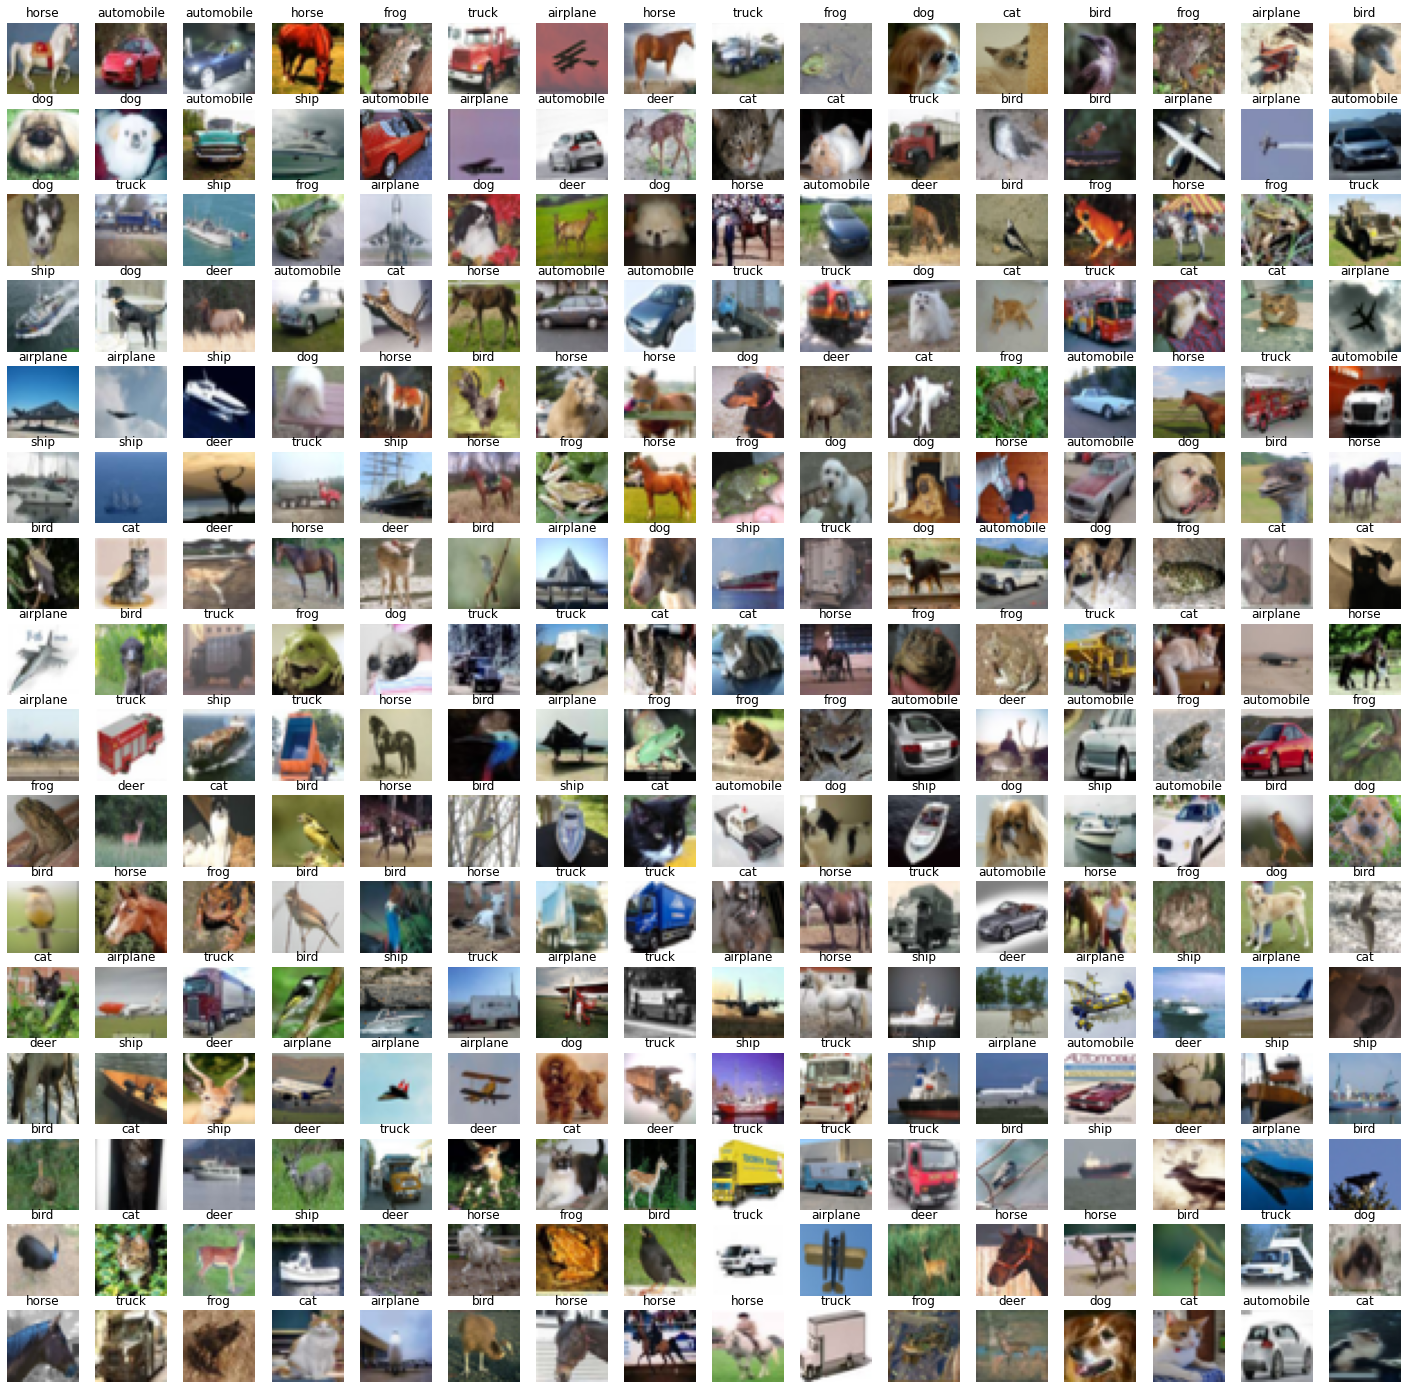

In [19]:
plt.figure(figsize=(25, 25))
for i in range(256):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(16, 16, i+1, label=classes[int(y_train[rand_index])]) # label'ı belirtmemiz şart değil
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])    

## Data Preprocessing

In [20]:
X_train[5].min()  # 3 renk kanalı olduğu için herhangi birindeki minimum değer

0

In [21]:
X_train[5].max()  # 3 renk kanalı olduğu için herhangi birindeki maksimum değer

252

In [22]:
# Normalize image pixels (minmax scaling)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [23]:
X_train[5].min()

0.0

In [24]:
X_train[5].max()

0.9882353

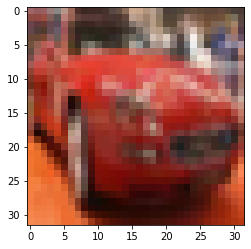

In [25]:
plt.imshow(X_train[5])

In [26]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [27]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [28]:
from tensorflow.keras.utils import to_categorical

In [29]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

# class sayısını yazmak şart değil ama yazmazsak default olarak "max(y)+1" sayısınca belirlenecek;
# farklı bir datada class'lar için verile sayılar 0'dan başlayıp sıra ile gitmezse ya da arada atlanan sayı olursa 
# bu durumda default değerini kullanmak hatalı sonuç vereceğinden ve
# notebook'u inceleyen farklı kişilerce anlaşılmasını kolaylaştırmak için class sayısını belirtmekte fayda var

(10000, 10)

In [30]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

#### Dropout layer extra info

[External link to the keras documentation about dropout layers. An important read!](https://keras.io/api/layers/regularization_layers/dropout/)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [32]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu', padding='same'))
        # input_shape  ===> modeli fit etmeden summary almamızı sağlıyor
    
        # resmin output size'ı (shape) buradan çıkınca da 32*32 olacak çünkü padding='same' olarak belirledik ancak 
        # 32 filtre kullandığımız için channel sayısı da 32 olacak

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
        # burada da output size 32*32*64 olacak

model.add(MaxPool2D(pool_size=(2, 2)))  # output size = 16*16*64

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))  # output layer

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss', patience=5) # CNN'de eğitim uzun sürdüğünden patience sayısını küçük belirledik

In [36]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 131s 83ms/step - loss: 1.3724 - accuracy: 0.5001 - val_loss: 1.0303 - val_accuracy: 0.6343
Epoch 2/50
1563/1563 [==============================] - 131s 84ms/step - loss: 0.9426 - accuracy: 0.6680 - val_loss: 0.9109 - val_accuracy: 0.6824
Epoch 3/50
1563/1563 [==============================] - 130s 83ms/step - loss: 0.7982 - accuracy: 0.7202 - val_loss: 0.8590 - val_accuracy: 0.7005
Epoch 4/50
1563/1563 [==============================] - 130s 83ms/step - loss: 0.6963 - accuracy: 0.7554 - val_loss: 0.7840 - val_accuracy: 0.7302
Epoch 5/50
1563/1563 [==============================] - 127s 81ms/step - loss: 0.6114 - accuracy: 0.7826 - val_loss: 0.8424 - val_accuracy: 0.7163
Epoch 6/50
1563/1563 [==============================] - 124s 79ms/step - loss: 0.5371 - accuracy: 0.8113 - val_loss: 0.8476 - val_accuracy: 0.7197
Epoch 7/50
1563/1563 [==============================] - 131s 84ms/step - loss: 0.4731 - accuracy: 0.8328 - val_loss: 0

In [37]:
model.metrics_names

['loss', 'accuracy']

In [38]:
model.history.history

{'loss': [1.372380018234253,
  0.9426072835922241,
  0.7981752157211304,
  0.6962810158729553,
  0.6113501787185669,
  0.5370622873306274,
  0.4730699956417084,
  0.41017597913742065,
  0.35946550965309143],
 'accuracy': [0.5001400113105774,
  0.667959988117218,
  0.7202200293540955,
  0.7553600072860718,
  0.7825800180435181,
  0.8112800121307373,
  0.8328199982643127,
  0.8540400266647339,
  0.8722000122070312],
 'val_loss': [1.0302602052688599,
  0.9108548760414124,
  0.8590121269226074,
  0.7840244174003601,
  0.8423804640769958,
  0.8475756049156189,
  0.8552964925765991,
  0.8875158429145813,
  0.9742608666419983],
 'val_accuracy': [0.6342999935150146,
  0.6823999881744385,
  0.7005000114440918,
  0.7301999926567078,
  0.7163000106811523,
  0.7196999788284302,
  0.7365000247955322,
  0.73089998960495,
  0.7210000157356262]}

In [39]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.372380,0.50014,1.030260,0.6343
1,0.942607,0.66796,0.910855,0.6824
2,0.798175,0.72022,0.859012,0.7005
3,0.696281,0.75536,0.784024,0.7302
4,0.611350,0.78258,0.842380,0.7163


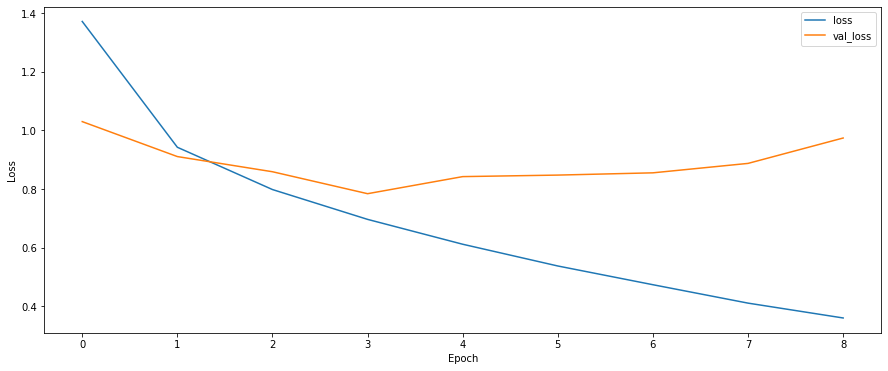

In [40]:
plt.figure(figsize=(15, 6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

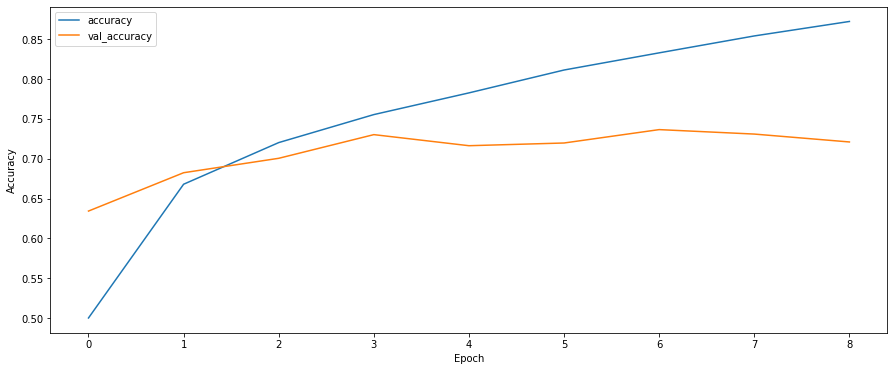

In [41]:
plt.figure(figsize=(15, 6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

# overfit var

In [42]:
print(model.evaluate(X_test, Y_test, verbose=1))

313/313 [==============================] - 7s 21ms/step - loss: 0.9743 - accuracy: 0.7210
[0.9742608666419983, 0.7210000157356262]


In [43]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [44]:
preds = model.predict(X_test)

In [45]:
predictions = np.argmax(preds, axis=1)

In [46]:
predictions

array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      1000
           1       0.89      0.77      0.82      1000
           2       0.60      0.64      0.62      1000
           3       0.54      0.47      0.50      1000
           4       0.62      0.76      0.68      1000
           5       0.71      0.54      0.61      1000
           6       0.78      0.75      0.76      1000
           7       0.81      0.77      0.79      1000
           8       0.81      0.84      0.83      1000
           9       0.75      0.88      0.81      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



In [48]:
print(confusion_matrix(y_test, predictions))

[[788  14  41  18  25   4   6   6  63  35]
 [ 23 769  10   5   5   1   4   4  37 142]
 [ 75   3 640  50 103  23  48  28  15  15]
 [ 33  16  89 470 102 117  89  35  23  26]
 [ 23   4  75  40 764  23  23  35   8   5]
 [ 25   7  77 183  68 543  22  49  10  16]
 [ 10   6  71  51  75  14 748   5  11   9]
 [ 19   2  42  37  73  39   5 765   6  12]
 [ 59  17  10  10  10   2   7   6 844  35]
 [ 30  30   7  12  10   1   5   6  20 879]]


In [49]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9742608666419983
Test accuracy: 0.7210000157356262


In [50]:
my_image = X_test[44]

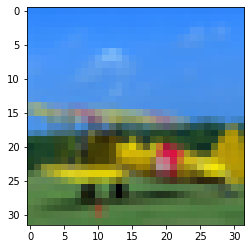

In [51]:
plt.imshow(my_image)

In [52]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))
# train setlerimizi modele hazırlarken X_train(50000, 32, 32, 3) yani 4 boyutlu olarak eğittik; bu nedenle reshape ile
# aynı boyuta getirmemiz gerekir; buradaki 1, tek resim için anlamında

In [53]:
image_prediction

array([[0.999297  , 0.00000039, 0.00000011, 0.        , 0.00000095,
        0.        , 0.00000008, 0.00000006, 0.00000256, 0.00069879]],
      dtype=float32)

In [54]:
np.argmax(image_prediction, axis=1)

array([0], dtype=int64)

In [55]:
result=np.argmax(image_prediction, axis=1)

In [56]:
result

array([0], dtype=int64)

In [57]:
classes[int(result)]

'airplane'

In [ ]:
#model.save("cnn-1.h5")

In [58]:
early_stop = EarlyStopping(monitor='val_loss', patience=15)

In [59]:
# overfit'i düşürmek için dropout ekledik

model= Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3),padding='same'))
        
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [61]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/100
1563/1563 [==============================] - 178s 113ms/step - loss: 1.3767 - accuracy: 0.5061 - val_loss: 1.0080 - val_accuracy: 0.6528
Epoch 2/100
1563/1563 [==============================] - 181s 116ms/step - loss: 0.9659 - accuracy: 0.6592 - val_loss: 0.8775 - val_accuracy: 0.6898
Epoch 3/100
1563/1563 [==============================] - 182s 116ms/step - loss: 0.8246 - accuracy: 0.7092 - val_loss: 0.7794 - val_accuracy: 0.7291
Epoch 4/100
1563/1563 [==============================] - 165s 106ms/step - loss: 0.7346 - accuracy: 0.7417 - val_loss: 0.7409 - val_accuracy: 0.7408
Epoch 5/100
1563/1563 [==============================] - 166s 106ms/step - loss: 0.6607 - accuracy: 0.7674 - val_loss: 0.7071 - val_accuracy: 0.7585
Epoch 6/100
1563/1563 [==============================] - 167s 107ms/step - loss: 0.6152 - accuracy: 0.7857 - val_loss: 0.7121 - val_accuracy: 0.7572
Epoch 7/100
1563/1563 [==============================] - 170s 109ms/step - loss: 0.5684 - accuracy: 0.7972

In [62]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8511043190956116
Test accuracy: 0.7674999833106995


In [63]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

In [64]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1000
           1       0.88      0.89      0.88      1000
           2       0.62      0.70      0.66      1000
           3       0.61      0.51      0.55      1000
           4       0.74      0.76      0.75      1000
           5       0.66      0.69      0.68      1000
           6       0.84      0.80      0.82      1000
           7       0.81      0.83      0.82      1000
           8       0.84      0.88      0.86      1000
           9       0.88      0.82      0.85      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



In [65]:
print(confusion_matrix(y_test, predictions))

[[794   9  68  14  15  13   8   9  43  27]
 [  8 888   7   6   1   2  11   1  28  48]
 [ 48   3 701  46  72  44  38  25  15   8]
 [ 26   7  97 507  64 176  55  43  17   8]
 [  9   2  86  27 764  38  17  46   9   2]
 [ 12   2  47 132  35 694  16  42  14   6]
 [  7   3  63  48  36  30 796   6   9   2]
 [ 10   2  40  28  40  49   1 826   1   3]
 [ 38  15  20   9   6   4   6   8 881  13]
 [ 28  80   7  13   1   3   2  15  27 824]]


<AxesSubplot:>

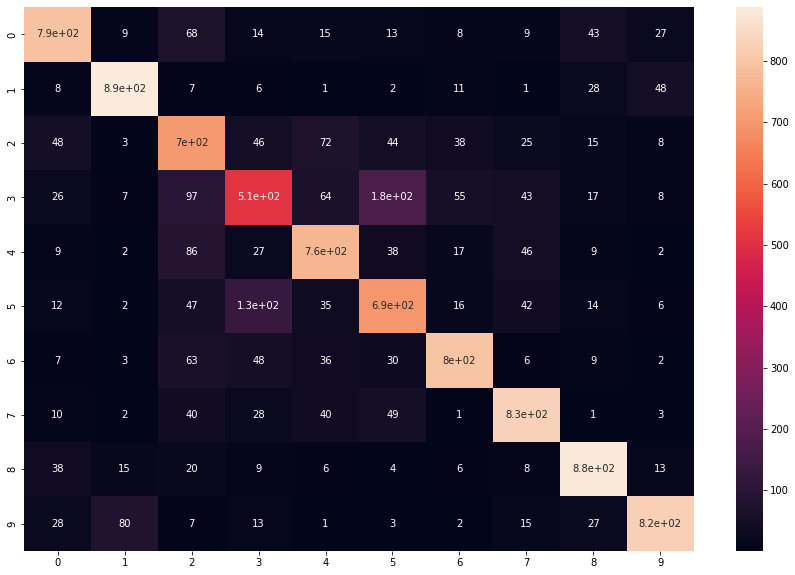

In [66]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [67]:
from tensorflow.keras.layers import BatchNormalization

In [68]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
# BATCH NORMALIZATION
# Batch normalization sayesinde ağdaki katmanlar, önceki katmanın öğrenmesini beklemek zorunda kalmaz. 
# Eş zamanlı olarak öğrenime olanak sağlar. Eğitimin hızlanmasını sağlar.
# Eğitilebilir iki parametresi de olduğundan her backpropagation işleminden sonra parametreleri (gamma ve beta) güncellenir.

In [69]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization()) # model bu şekilde bir önceki layer'dan ne geliyorsa onu normalize etmeyi öğreniyor
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [70]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [71]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/100
1563/1563 [==============================] - 369s 235ms/step - loss: 1.4784 - accuracy: 0.4923 - val_loss: 1.0778 - val_accuracy: 0.6180
Epoch 2/100
1563/1563 [==============================] - 358s 229ms/step - loss: 0.9091 - accuracy: 0.6913 - val_loss: 0.8103 - val_accuracy: 0.7229
Epoch 3/100
1563/1563 [==============================] - 349s 223ms/step - loss: 0.7219 - accuracy: 0.7593 - val_loss: 0.8719 - val_accuracy: 0.7069
Epoch 4/100
1563/1563 [==============================] - 334s 214ms/step - loss: 0.6008 - accuracy: 0.7998 - val_loss: 0.6560 - val_accuracy: 0.7766
Epoch 5/100
1563/1563 [==============================] - 362s 232ms/step - loss: 0.4987 - accuracy: 0.8357 - val_loss: 0.6247 - val_accuracy: 0.7851
Epoch 6/100
1563/1563 [==============================] - 333s 213ms/step - loss: 0.4107 - accuracy: 0.8651 - val_loss: 0.6071 - val_accuracy: 0.8040
Epoch 7/100
1563/1563 [==============================] - 329s 211ms/step - loss: 0.3325 - accuracy: 0.8893

In [72]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.76604163646698
Test accuracy: 0.8043000102043152


In [73]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

In [74]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79      1000
           1       0.89      0.93      0.91      1000
           2       0.83      0.60      0.70      1000
           3       0.63      0.69      0.66      1000
           4       0.83      0.76      0.79      1000
           5       0.80      0.69      0.74      1000
           6       0.90      0.80      0.85      1000
           7       0.79      0.90      0.84      1000
           8       0.84      0.92      0.88      1000
           9       0.85      0.90      0.87      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



In [75]:
print(confusion_matrix(y_test, predictions))

[[866  16   5   7   2   0   2  13  66  23]
 [  9 930   0   6   0   1   2   0  13  39]
 [151   3 596  63  49  47  21  32  20  18]
 [ 39   3  25 691  35  81  36  40  24  26]
 [ 31   3  26  42 762  16  18  85  10   7]
 [ 20   1  22 167  30 686  11  44   4  15]
 [ 11   9  26  77  25  13 801  12  16  10]
 [ 12   2   9  31  14  18   0 900   6   8]
 [ 33  15   5   8   1   0   2   3 915  18]
 [ 13  66   1   1   0   0   1   6  16 896]]
